In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'E:\MY_DOCUMENTS\Data_analytics\Python\Project\Seasonal Sales Trends Analysis\stores_sales_forecasting.csv', encoding = 'unicode_escape')

In [3]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [4]:
data.tail(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.980,1,0.0,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332


In [5]:
data.shape

(2121, 21)

In [6]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [7]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
data.nunique()

Row ID           2121
Order ID         1764
Order Date        889
Ship Date         960
Ship Mode           4
Customer ID       707
Customer Name     707
Segment             3
Country             1
City              371
State              48
Postal Code       454
Region              4
Product ID        375
Category            1
Sub-Category        4
Product Name      380
Sales            1636
Quantity           14
Discount           11
Profit           1777
dtype: int64

In [9]:
##data['Ship Mode'].unique()
data['Segment'].unique()
##data['Region'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [10]:
data.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [11]:
SalesData = data.drop(['Order ID', 'Customer ID', 'Order Date', 'Ship Date', 'Country', 'Postal Code', 'Category'], axis = 1)

In [12]:
SalesData.head(3)

,Row ID,Ship Mode,Customer Name,Segment,City,State,Region,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


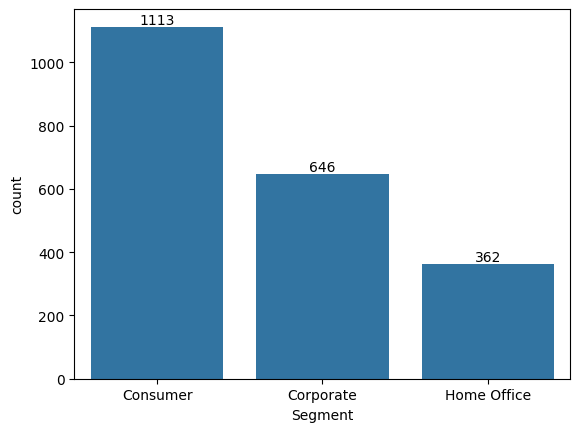

In [13]:
ax = sns.countplot(x= 'Segment', data = SalesData)

for bars in ax.containers:
    ax.bar_label(bars)

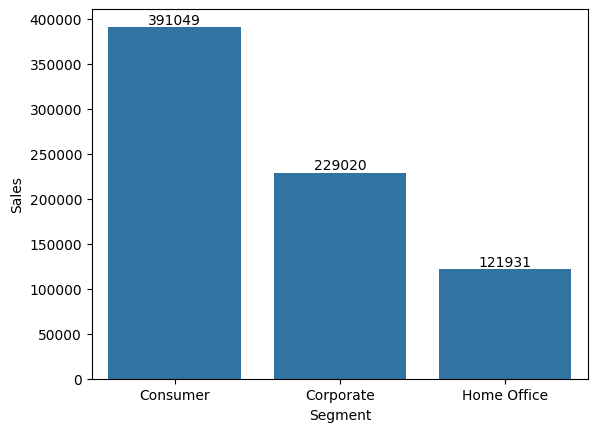

In [14]:
SalesSegment = SalesData.groupby(['Segment'],as_index=False)['Sales'].sum().sort_values(by = 'Sales', ascending=False)

bar_plot = sns.barplot(x= 'Segment', y= 'Sales', data = SalesSegment)

for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

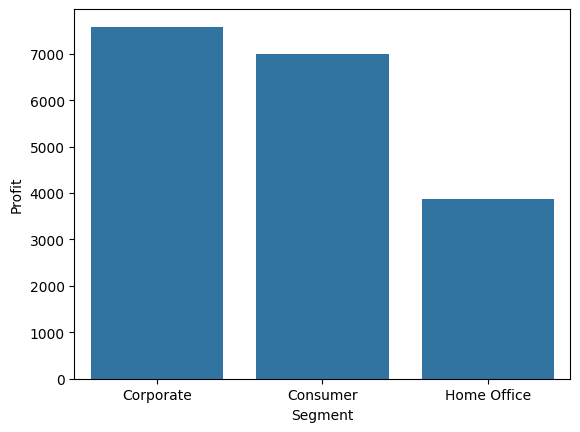

In [15]:
ProfitSegment = SalesData.groupby(['Segment'],as_index = False)['Profit'].sum().sort_values(by = 'Profit', ascending = False)

bar_polt = sns.barplot(x= 'Segment', y= 'Profit', data = ProfitSegment)


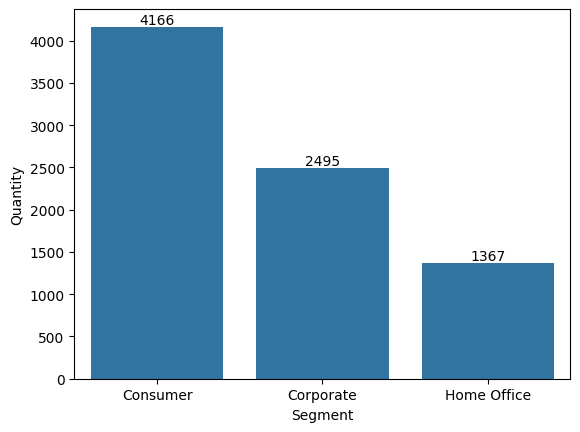

In [16]:
QuantitySegment = SalesData.groupby(['Segment'], as_index = False)['Quantity'].sum().sort_values(by = 'Quantity', ascending = False)

Bar_plot = sns.barplot(x = 'Segment', y = 'Quantity', data = QuantitySegment)

for bars in Bar_plot.containers:
    Bar_plot.bar_label(bars)

*From the above graphs, we can see that most of the sales come from consumer segment if we see quantity wise consumer segment is leading the chart but we are makeing more profit from  corporate segment*

**Sub-Category**

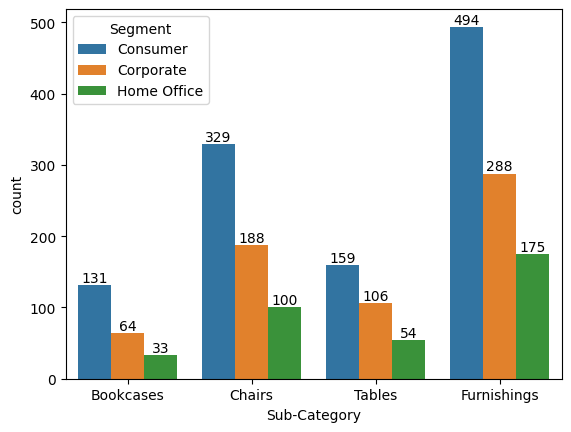

In [17]:
ab = sns.countplot(data = SalesData, x= 'Sub-Category', hue= 'Segment')

for bars in ab.containers:
    ab.bar_label(bars)

<Axes: xlabel='Sub-Category', ylabel='Sales'>

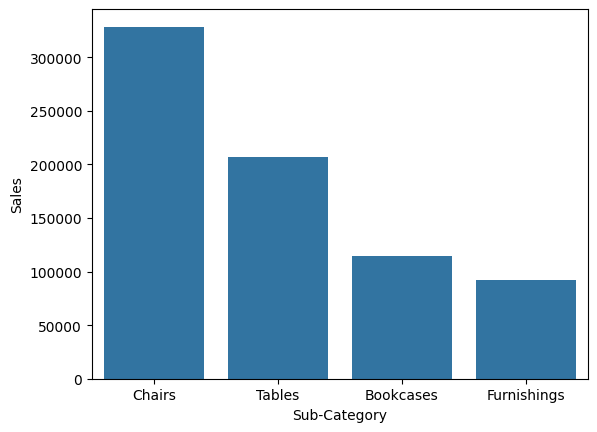

In [18]:
SalesCategory = SalesData.groupby(['Sub-Category'], as_index= False)['Sales'].sum().sort_values(by = 'Sales', ascending = False)

sns.barplot(x= 'Sub-Category', y = 'Sales', data = SalesCategory)

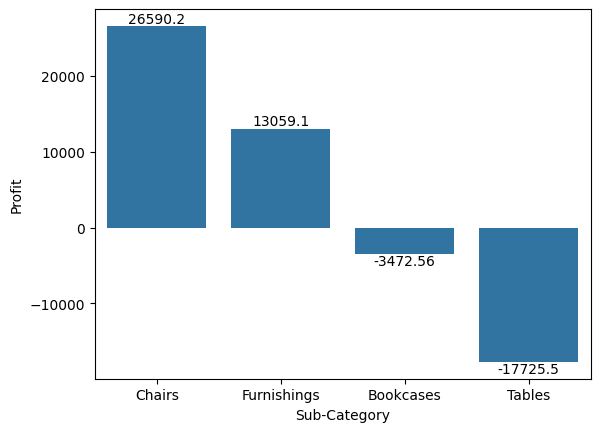

In [21]:
ProfitCategory = SalesData.groupby(['Sub-Category'], as_index = False)['Profit'].sum().sort_values(by = 'Profit', ascending = False)

bar_plot = sns.barplot(x= 'Sub-Category', y= 'Profit', data = ProfitCategory)

for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

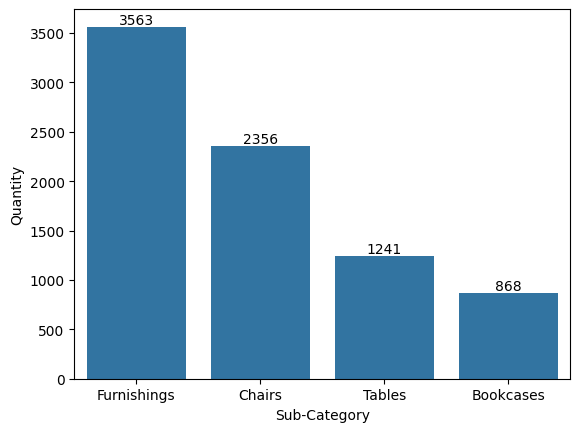

In [22]:
QuantityCategory = SalesData.groupby(['Sub-Category'], as_index = False)['Quantity'].sum().sort_values(by = 'Quantity', ascending = False)

Bar_plot = sns.barplot(x= 'Sub-Category', y= 'Quantity', data = QuantityCategory)

for bars in Bar_plot.containers:
    Bar_plot.bar_label(bars)

*From the above graphs, we can see that most of the sales come from chairs sub-category if we see quantity wise furnishings sub-category is leading the chart but we are makeing more profit from chairs sub-category we are also making lose from bookcases and tables*